In [22]:
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *
import pandas as pd
from scipy import stats
import ipywidgets as widgets
from IPython.display import display

###  Poisson Distribution (Matplotlib)
    Scenarios-
    λ = 2: Number of patients arriving in an emergency room per day.
    λ = 5: Number of typos per page in a draft manuscript
    λ = 8: Number of vehicles passing through a quiet intersection per minute

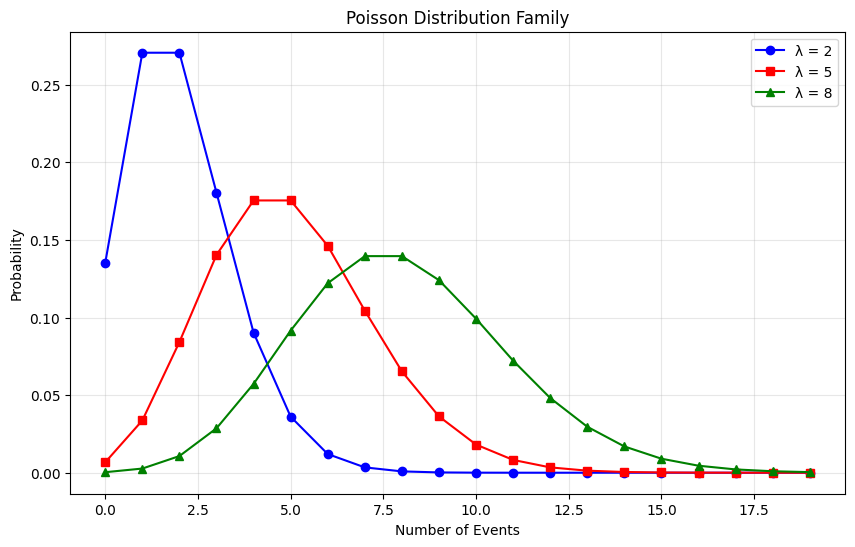

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(0, 20)

lambda_vals = [2, 5, 8]
colors = ['blue', 'red', 'green']
styles = ['-o', '-s', '-^']

for lam, col, style in zip(lambda_vals, colors, styles):
    pmf = stats.poisson.pmf(x, lam)
    ax.plot(x, pmf, style, label=f'λ = {lam}', color=col, markersize=6)

ax.set_title('Poisson Distribution Family')
ax.set_xlabel('Number of Events')
ax.set_ylabel('Probability')
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()

###  Gamma Distribution
    examples
    
    k = 2: Time until equipment failure in production
    k = 5: Length of customer service calls in minutes
    k = 9: Time to complete a complex task in software development

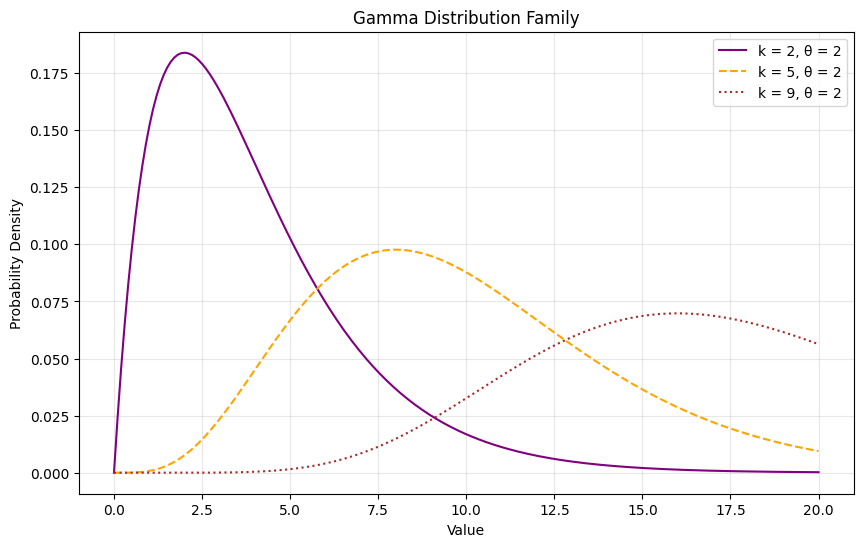

In [24]:
fig, ax = plt.subplots(figsize=(10, 6))
x = np.linspace(0, 20, 200)

k_vals = [2, 5, 9]
theta = 2
colors = ['purple', 'orange', 'brown']
styles = ['-', '--', ':']

for k, col, style in zip(k_vals, colors, styles):
    pdf = stats.gamma.pdf(x, a=k, scale=theta)
    ax.plot(x, pdf, style, label=f'k = {k}, θ = {theta}', color=col)

ax.set_title('Gamma Distribution Family')
ax.set_xlabel('Value')
ax.set_ylabel('Probability Density')
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()

###  Weibull Distribution
    Real-world scenarios:
    
    shape = 2.5: Time until electronic component failure
    shape = 3.5: Wind speed distribution in meteorological studies
    shape = 5.5: Material strength in quality control

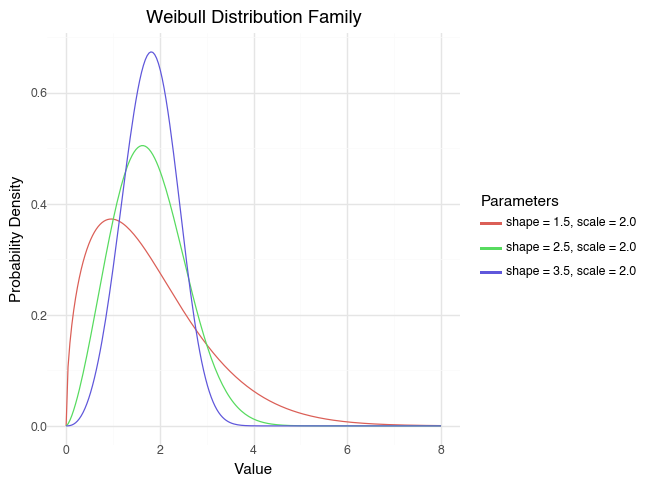

In [25]:
shape_vals = [1.5, 2.5, 3.5]
scale = 2.0
x = np.linspace(0, 8, 200)
data = []

for shape in shape_vals:
    pdf = stats.weibull_min.pdf(x, shape, loc=0, scale=scale)
    for xi, pi in zip(x, pdf):
        data.append({'x': xi, 'Density': pi, 
                    'Parameters': f'shape = {shape}, scale = {scale}'})

df = pd.DataFrame(data)
plot = (ggplot(df, aes(x='x', y='Density', color='Parameters', group='Parameters')) +
        geom_line() +
        labs(title='Weibull Distribution Family',
             x='Value',
             y='Probability Density') +
        theme_minimal())
plot.show()

###  Beta Distribution

    Scenarios-
    Modeling conversion rates in A/B testing
    Estimating success probabilities in clinical trials
    Analyzing survey response distributions on a 0-1 scale

In [27]:
@widgets.interact(
    alpha=(0.1, 5.0, 0.1),
    beta=(0.1, 5.0, 0.1)
)
def plot_beta(alpha=1.0, beta=1.0):
    x = np.linspace(0, 1, 100)
    y = stats.beta.pdf(x, alpha, beta)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, 'b-', lw=2)
    plt.title(f'Beta Distribution (α={alpha:.1f}, β={beta:.1f})')
    plt.xlabel('Value')
    plt.ylabel('Probability Density')
    plt.grid(True, alpha=0.3)
    plt.show()

interactive(children=(FloatSlider(value=1.0, description='alpha', max=5.0, min=0.1), FloatSlider(value=1.0, de…